In [1]:
#import needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
df_application_record = pd.read_csv("../content/application_record.csv")
df_credit_record = pd.read_csv("../content/credit_record.csv")

print(df_application_record.info())
print(df_application_record.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169363 entries, 0 to 169362
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   169363 non-null  int64  
 1   CODE_GENDER          169363 non-null  object 
 2   FLAG_OWN_CAR         169363 non-null  object 
 3   FLAG_OWN_REALTY      169363 non-null  object 
 4   CNT_CHILDREN         169363 non-null  int64  
 5   AMT_INCOME_TOTAL     169363 non-null  float64
 6   NAME_INCOME_TYPE     169362 non-null  object 
 7   NAME_EDUCATION_TYPE  169362 non-null  object 
 8   NAME_FAMILY_STATUS   169362 non-null  object 
 9   NAME_HOUSING_TYPE    169362 non-null  object 
 10  DAYS_BIRTH           169362 non-null  float64
 11  DAYS_EMPLOYED        169362 non-null  float64
 12  FLAG_MOBIL           169362 non-null  float64
 13  FLAG_WORK_PHONE      169362 non-null  float64
 14  FLAG_PHONE           169362 non-null  float64
 15  FLAG_EMAIL       

In [5]:
df_application_record = df_application_record.drop_duplicates(subset = 'ID', keep = False)
df_application_record.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169363 entries, 0 to 169362
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   169363 non-null  int64  
 1   CODE_GENDER          169363 non-null  object 
 2   FLAG_OWN_CAR         169363 non-null  object 
 3   FLAG_OWN_REALTY      169363 non-null  object 
 4   CNT_CHILDREN         169363 non-null  int64  
 5   AMT_INCOME_TOTAL     169363 non-null  float64
 6   NAME_INCOME_TYPE     169362 non-null  object 
 7   NAME_EDUCATION_TYPE  169362 non-null  object 
 8   NAME_FAMILY_STATUS   169362 non-null  object 
 9   NAME_HOUSING_TYPE    169362 non-null  object 
 10  DAYS_BIRTH           169362 non-null  float64
 11  DAYS_EMPLOYED        169362 non-null  float64
 12  FLAG_MOBIL           169362 non-null  float64
 13  FLAG_WORK_PHONE      169362 non-null  float64
 14  FLAG_PHONE           169362 non-null  float64
 15  FLAG_EMAIL       

In [6]:
print("# of unique IDs that are consistent between both datasets", df_application_record[df_application_record['ID'].isin(df_credit_record['ID'])]['ID'].nunique())
df_application_record = df_application_record[df_application_record['ID'].isin(df_credit_record['ID'])]
df_credit_record = df_credit_record[df_credit_record['ID'].isin(df_application_record['ID'])]
print("New # of IDs in application_record", df_application_record['ID'].nunique())
print("New # of IDs in credit_record", df_credit_record['ID'].nunique())

# of unique IDs that are consistent between both datasets 36105
New # of IDs in application_record 36105
New # of IDs in credit_record 36105


In [7]:
df_application_record = df_application_record.drop(columns=['CODE_GENDER', 'NAME_FAMILY_STATUS', 'DAYS_BIRTH'])

In [8]:
def determine_approval(df):
    if(df['STATUS'] == 'X'): return -1
    elif(df['STATUS'] == '1' or df['STATUS'] == '2' or df['STATUS'] == '3' or df['STATUS'] == '4' or df['STATUS'] == '5'): return 0
    elif(df['STATUS'] == 'C' or df['STATUS'] == '0'): return 1

In [9]:
df_credit_record['APPROVED'] = df_credit_record.apply(determine_approval, axis=1)
df_credit_record = df_credit_record[df_credit_record['APPROVED']!=-1]
df_credit_record['STATUS'].value_counts()

C    326014
0    288008
1      7874
5       937
2       318
3       132
4       100
Name: STATUS, dtype: int64

In [10]:
df_application_record = df_application_record.merge(df_credit_record, on='ID')
df_application_record.head(10)

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,APPROVED
0,5008804,Y,Y,0,427500.0,Working,Higher education,Rented apartment,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,0,C,1
1,5008804,Y,Y,0,427500.0,Working,Higher education,Rented apartment,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,-1,C,1
2,5008804,Y,Y,0,427500.0,Working,Higher education,Rented apartment,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,-2,C,1
3,5008804,Y,Y,0,427500.0,Working,Higher education,Rented apartment,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,-3,C,1
4,5008804,Y,Y,0,427500.0,Working,Higher education,Rented apartment,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,-4,C,1
5,5008804,Y,Y,0,427500.0,Working,Higher education,Rented apartment,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,-5,C,1
6,5008804,Y,Y,0,427500.0,Working,Higher education,Rented apartment,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,-6,C,1
7,5008804,Y,Y,0,427500.0,Working,Higher education,Rented apartment,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,-7,C,1
8,5008804,Y,Y,0,427500.0,Working,Higher education,Rented apartment,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,-8,C,1
9,5008804,Y,Y,0,427500.0,Working,Higher education,Rented apartment,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,-9,C,1


In [11]:
df_application_record = df_application_record[df_application_record['MONTHS_BALANCE']==-4]

In [12]:
df_application_record.head()

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,APPROVED
4,5008804,Y,Y,0,427500.0,Working,Higher education,Rented apartment,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,-4,C,1
19,5008805,Y,Y,0,427500.0,Working,Higher education,Rented apartment,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,-4,C,1
33,5008806,Y,Y,0,112500.0,Working,Secondary / secondary special,House / apartment,-1134.0,1.0,0.0,0.0,0.0,Security staff,2.0,-4,C,1
49,5008810,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,House / apartment,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,-4,C,1
70,5008811,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,House / apartment,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,-4,C,1


Text(0.5, 1.0, 'Income types for those with no stated occupation')

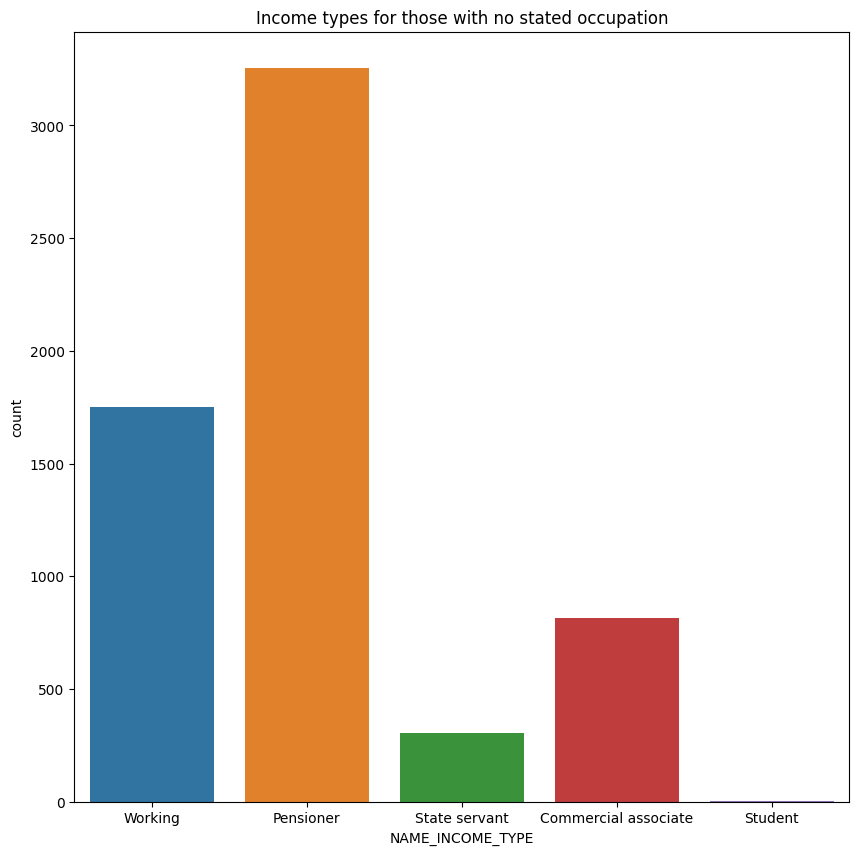

In [13]:
plt.figure(figsize=(10,10))
sns.countplot(x= df_application_record[df_application_record["OCCUPATION_TYPE"].isna()]["NAME_INCOME_TYPE"])
plt.title("Income types for those with no stated occupation")

In [14]:
df_application_record.loc[df_application_record["NAME_INCOME_TYPE"]=="Pensioner","OCCUPATION_TYPE"] = "Pension"
df_application_record.loc[df_application_record["NAME_INCOME_TYPE"]=="Commercial associate","OCCUPATION_TYPE"] = "Commercial associate"
df_application_record.loc[df_application_record["NAME_INCOME_TYPE"]=="State servant","OCCUPATION_TYPE"] = "State servant"
df_application_record.loc[df_application_record["NAME_INCOME_TYPE"]=="Student","OCCUPATION_TYPE"] = "Student"
df_application_record = df_application_record.dropna()
df_application_record.isna().sum()

ID                     0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_HOUSING_TYPE      0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
MONTHS_BALANCE         0
STATUS                 0
APPROVED               0
dtype: int64

In [15]:
print(df_application_record[df_application_record['DAYS_EMPLOYED'] > 50000].count())
df_application_record = df_application_record.drop(df_application_record[df_application_record['DAYS_EMPLOYED']>100000].index)
df_application_record = df_application_record.drop(columns=['STATUS'])

ID                     3253
FLAG_OWN_CAR           3253
FLAG_OWN_REALTY        3253
CNT_CHILDREN           3253
AMT_INCOME_TOTAL       3253
NAME_INCOME_TYPE       3253
NAME_EDUCATION_TYPE    3253
NAME_HOUSING_TYPE      3253
DAYS_EMPLOYED          3253
FLAG_MOBIL             3253
FLAG_WORK_PHONE        3253
FLAG_PHONE             3253
FLAG_EMAIL             3253
OCCUPATION_TYPE        3253
CNT_FAM_MEMBERS        3253
MONTHS_BALANCE         3253
STATUS                 3253
APPROVED               3253
dtype: int64


In [16]:
categorical_columns = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY','NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']
categorical_df = df_application_record[categorical_columns]
categorical_df = categorical_df.apply(lambda x: pd.factorize(x)[0])
categorical_df = pd.DataFrame(categorical_df)
df_application_record[categorical_columns] = categorical_df
print(df_application_record['APPROVED'].value_counts())
df_application_record.head()

1    14511
0      232
Name: APPROVED, dtype: int64


,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,APPROVED
33,5008806,0,0,0,112500.0,0,0,0,-1134.0,1.0,0.0,0.0,0.0,0,2.0,-4,1
49,5008810,1,0,0,270000.0,1,0,0,-3051.0,1.0,0.0,1.0,1.0,1,1.0,-4,1
70,5008811,1,0,0,270000.0,1,0,0,-3051.0,1.0,0.0,1.0,1.0,1,1.0,-4,1
145,5008815,0,0,0,270000.0,0,1,0,-769.0,1.0,1.0,1.0,1.0,2,2.0,-4,1
148,5112956,0,0,0,270000.0,0,1,0,-769.0,1.0,1.0,1.0,1.0,2,2.0,-4,1


In [18]:
X = df_application_record.drop(['APPROVED', 'ID'], axis = 1)
y = df_application_record['APPROVED']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [20]:
rfc = RandomForestClassifier(n_estimators = 1000, max_features = 12)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.21      0.04      0.07        67
           1       0.98      1.00      0.99      3619

    accuracy                           0.98      3686
   macro avg       0.60      0.52      0.53      3686
weighted avg       0.97      0.98      0.97      3686

